<a href="https://colab.research.google.com/github/jeffersonramelo/Peper-relato-integrado-DIF-DIF/blob/main/OLS_e_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas openpyxl

In [35]:
import pandas as pd

# Caminho para o seu arquivo XLSX
arquivo_xlsx = '/content/merged_data_final todas.xlsx'

# Lendo o arquivo XLSX
try:
    df = pd.read_excel(arquivo_xlsx, engine='openpyxl')
    # Exibindo as primeiras linhas do DataFrame para verificar os df
    print(df.head())
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")

   id codigo                                Nome_Companhia        Nome  \
0   1   AESB                        AES Brasil Energia S/A  AES Brasil   
1   2   AMBP  AMBIPAR PARTICIPAÇÕES E EMPREENDIMENTOS S.A.     Ambipar   
2   3   AZUL                                     AZUL S.A.        Azul   
3   4   CEAB                                C&A MODAS S.A.   Cea Modas   
4   5   SBSP        CIA SANEAMENTO BÁSICO ESTADO SÃO PAULO      Sabesp   

    SetorEconômicob3    SubsetorBovespa  ValorMercado30Abr11  \
0  Utilidade pública   Energia elétrica                  NaN   
1  Utilidade pública  Água e saneamento                  NaN   
2   Bens industriais         Transporte                  NaN   
3    Consumo cíclico           Comércio                  NaN   
4  Utilidade pública  Água e saneamento          10382514.91   

   ValorMercado30Mai11  ValorMercado30Jun11  PU30Abr11  ...  Setor_Outros  \
0                  NaN                  NaN        NaN  ...             0   
1               

In [ ]:
print(df.columns.tolist())


['codigo', 'Nome_Companhia', 'Nome', 'SetorEconômicob3', 'SubsetorBovespa', 'SetorEconomatica', 'ValorMercado30Abr11', 'ValorMercado30Mai11', 'ValorMercado30Jun11', 'PU30Abr11', 'PU30Mai11', 'PU30Jun11', 'PatrimLiqDez2010', 'LucroLiquidoDez2010', 'ativototalt-1', 'ativototalt', 'IntangDez2010', 'CaixaEEqCxDez2010', 'ReceitaDez2010', 'CxGerOpDez2010', 'OuReAbDez2010', 'LPADez2010', 'quantacoes', 'ano', 'Data_Entrega', 'Categoria', 'Link_Download', 'd_divulga', 'IIRC', 'financeiro', 'manufaturado', 'intelectual', 'humano', 'social', 'relacionamento', 'natural', 'd_IIRC', 'IIRC+ESG', 'IIRC+auditoria', 'SASB', 'CPC_09', 'value_reporting_foundation', 'asseguracao', 'Auditores_Independentes', 'GRI', 'ESG', 'Environmental', 'Social', 'Governance', 'Ambiental', 'Governança', 'fog_index', 'flesch_index', 'd_fog_divulga', 'd_flesch_divulga', 'd_fog_IIRC', 'd_flesch_IIRC']


In [36]:
import pandas as pd

# Supondo que 'df' é o seu DataFrame
df = df[df['ano'].isin([2020, 2021, 2022])]

# Lista de variáveis para análise estatística descritiva, incluindo 'ano'
variaveis = [
    'ValorMercado30Jun11', 'PatrimLiqDez2010',
    'LucroLiquidoDez2010', 'd_prej','d_divulga', 'd_IIRC',  'fog_index', 'flesch_index', 'ano'
]

# Colunas específicas para remover NaN
colunas_para_remover_nan = ['ValorMercado30Jun11', 'PatrimLiqDez2010', 'LucroLiquidoDez2010']

# Primeiro, removendo linhas com NaN nas colunas específicas
df_limpo = df.dropna(subset=colunas_para_remover_nan)

# Depois, excluindo linhas onde 'PatrimLiqDez2010' é menor que zero
df_limpo = df_limpo[df_limpo['PatrimLiqDez2010'] >= 0]

# Excluir empresas do setor financeiro
df_limpo = df_limpo.loc[df['Setor_Finanças e Seguros'] != 1]

# Escalonar as variáveis pela coluna 'ativototalt-1'
variaveis_para_escalonar = ['ValorMercado30Jun11', 'PatrimLiqDez2010', 'LucroLiquidoDez2010']
for variavel in variaveis_para_escalonar:
    df_limpo[variavel] = df_limpo[variavel] / df_limpo['ativototalt-1']

# Recalcular as estatísticas descritivas para as variáveis escalonadas no DataFrame limpo
estatisticas_descritivas = df_limpo[variaveis].describe()

print(estatisticas_descritivas)


       ValorMercado30Jun11  PatrimLiqDez2010  LucroLiquidoDez2010      d_prej  \
count           839.000000        839.000000           839.000000  842.000000   
mean             40.811508          0.760341             0.513297    0.186461   
std            1137.051571          5.061829            13.167082    0.389710   
min               0.015436          0.004867            -5.037346    0.000000   
25%               0.380512          0.306297             0.013095    0.000000   
50%               0.724575          0.450254             0.053382    0.000000   
75%               1.447845          0.642590             0.105147    0.000000   
max           32936.316962        141.720991           381.388527    1.000000   

        d_divulga      d_IIRC   fog_index  flesch_index          ano  
count  842.000000  346.000000  346.000000    343.000000   842.000000  
mean     0.410926    0.343931   14.590347     17.249010  2021.062945  
std      0.492294    0.475706    2.369599      6.802885  

In [37]:
import pandas as pd

# Suponha que 'df' é o seu DataFrame e as variáveis já foram definidas
# Calculando estatísticas descritivas para as variáveis selecionadas
# estatisticas_descritivas = df[variaveis].describe()

# Salvando o DataFrame de estatísticas descritivas em um arquivo Excel
nome_do_arquivo_excel = 'estatisticas_descritivas.xlsx'
estatisticas_descritivas.to_excel(nome_do_arquivo_excel, engine='openpyxl')

print(f'As estatísticas descritivas foram salvas com sucesso em: {nome_do_arquivo_excel}')


As estatísticas descritivas foram salvas com sucesso em: estatisticas_descritivas.xlsx


correlação

In [38]:
# Selecionar apenas as variáveis de interesse
variaveis_correlacao = [
    'ValorMercado30Jun11', 'PatrimLiqDez2010',
    'LucroLiquidoDez2010', 'd_prej','d_divulga', 'd_IIRC',  'fog_index', 'flesch_index'
]

# Suponha que 'df_limpo' seja o DataFrame após a limpeza
df_selecionado = df_limpo[variaveis_correlacao]

# Calcular a matriz de correlação
matriz_correlacao = df_selecionado.corr()

# Exibir a matriz de correlação
print(matriz_correlacao)


                     ValorMercado30Jun11  PatrimLiqDez2010  \
ValorMercado30Jun11             1.000000          0.963140   
PatrimLiqDez2010                0.963140          1.000000   
LucroLiquidoDez2010             0.999822          0.959213   
d_prej                         -0.016578          0.005057   
d_divulga                      -0.029151         -0.044018   
d_IIRC                          0.040805         -0.122037   
fog_index                       0.034129          0.037717   
flesch_index                    0.032096          0.060495   

                     LucroLiquidoDez2010    d_prej  d_divulga    d_IIRC  \
ValorMercado30Jun11             0.999822 -0.016578  -0.029151  0.040805   
PatrimLiqDez2010                0.959213  0.005057  -0.044018 -0.122037   
LucroLiquidoDez2010             1.000000 -0.022873  -0.028106  0.060466   
d_prej                         -0.022873  1.000000  -0.201524 -0.063126   
d_divulga                      -0.028106 -0.201524   1.000000     

In [39]:
import pandas as pd

# Suponha que 'df' é o seu DataFrame e as variáveis já foram definidas
# Calculando estatísticas descritivas para as variáveis selecionadas
# estatisticas_descritivas = df[variaveis].describe()

# Salvando o DataFrame de estatísticas descritivas em um arquivo Excel
nome_do_arquivo_excel = 'matriz_correlacao.xlsx'
matriz_correlacao.to_excel(nome_do_arquivo_excel, engine='openpyxl')

print(f'As estatísticas descritivas foram salvas com sucesso em: {nome_do_arquivo_excel}')


As estatísticas descritivas foram salvas com sucesso em: matriz_correlacao.xlsx


FILTROS

In [3]:
# Supondo que 'df' é o seu DataFrame
df = df[df['ano'].isin([2020, 2021, 2022])]

In [4]:
# Filtrar dados para o ano de 2022 e d_IIRC = 1
df = df[df['d_prej'] == 1]

In [ ]:
matriz_correlacao_spearman = df_selecionado.corr(method='spearman')
print(matriz_correlacao_spearman)


                     ValorMercado30Abr11  ValorMercado30Mai11  \
ValorMercado30Abr11             1.000000             0.997467   
ValorMercado30Mai11             0.997467             1.000000   
ValorMercado30Jun11             0.990776             0.995115   
PU30Abr11                       0.462747             0.456238   
PU30Mai11                       0.458674             0.456721   
PU30Jun11                       0.440219             0.442543   
PatrimLiqDez2010                0.864596             0.866229   
LucroLiquidoDez2010             0.697221             0.691569   
fog_index                      -0.178953            -0.184896   
flesch_index                   -0.004435            -0.000459   
ano                            -0.079886            -0.065259   
d_IIRC                          0.137557             0.140264   
d_divulga                       0.349891             0.356846   

                     ValorMercado30Jun11  PU30Abr11  PU30Mai11  PU30Jun11  \
ValorMercado

In [ ]:
import pandas as pd

# Suponha que 'df' é o seu DataFrame e as variáveis já foram definidas
# Calculando estatísticas descritivas para as variáveis selecionadas
# estatisticas_descritivas = df[variaveis].describe()

# Salvando o DataFrame de estatísticas descritivas em um arquivo Excel
nome_do_arquivo_excel = 'correlacao.xlsx'
matriz_correlacao_spearman.to_excel(nome_do_arquivo_excel, engine='openpyxl')

print(f'As estatísticas descritivas foram salvas com sucesso em: {nome_do_arquivo_excel}')

As estatísticas descritivas foram salvas com sucesso em: correlacao.xlsx


MANIPULAÇÃO DOS DADOS

In [30]:
# Filtrar os dados para incluir os anos de 2020, 2021 e 2022
#df = df[df['ano'].isin([2020, 2021, 2022])]

# Filtrar dados para o ano de 2022
df = df[df['ano'] == 2022]

# Excluir empresas com 'PatrimLiqDez2010' negativos
df = df[df['PatrimLiqDez2010'] > 0]

df = df.loc[df['Setor_Finanças e Seguros'] != 1]


In [31]:
from scipy.stats.mstats import winsorize

# Assumindo que df já foi definido e filtrado para os anos de 2020, 2021 e 2022
for col in ['PatrimLiqDez2010', 'LucroLiquidoDez2010']:
    # Aplicando winsorize em cada coluna selecionada com limites de 1% para os outliers em ambos os lados da distribuição
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

In [32]:
# Supondo que 'df' seja o seu DataFrame

# Escalonar as variáveis 'ValorMercado30Jun11', 'PatrimLiqDez2010', e 'LucroLiquidoDez2010' pelo 'ativototalt-1'
df['ValorMercado30Jun11'] = df['ValorMercado30Jun11'].div(df['ativototalt-1'])
df['PatrimLiqDez2010'] = df['PatrimLiqDez2010'].div(df['ativototalt-1'])
df['LucroLiquidoDez2010'] = df['LucroLiquidoDez2010'].div(df['ativototalt-1'])

# Agora, as variáveis 'ValorMercado30Jun11', 'PatrimLiqDez2010', e 'LucroLiquidoDez2010' no DataFrame 'df'
# estão escalonadas pelo 'ativototalt-1' e substituíram as originais


MQO

In [33]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'df' seja o seu DataFrame

# Definir a variável dependente diretamente sem escalonamento
y = df['ValorMercado30Jun11']

# Definir as variáveis independentes sem escalonamento
X = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Adicionar uma constante ao conjunto de variáveis independentes
X_limpado = sm.add_constant(X_limpado)

# Criar o modelo de regressão linear com covariância robusta à heteroscedasticidade
modelo_robusto = sm.OLS(y_limpado, X_limpado).fit(cov_type='HC3')

# Visualizar os resultados do modelo robusto
print(modelo_robusto.summary())

# Calcular o MedAE para o modelo robusto
y_pred_robusto = modelo_robusto.predict(X_limpado)
medae_robusto = np.median(np.abs(y_limpado - y_pred_robusto))

# Calcular o valor médio da variável dependente
valor_medio_y = np.mean(y_limpado)

# Calcular o MedAE escalado pelo valor médio da variável dependente (em percentagem)
medae_scaled_robusto = (medae_robusto / valor_medio_y) * 100

print("\nMedian Absolute Error (MedAE):", medae_robusto)
print("MedAE escalado pelo valor médio da variável dependente em percentagem:", medae_scaled_robusto)

# Função para calcular VIFs
def calculate_vif(dataframe):
    if 'const' in dataframe.columns:
        dataframe = dataframe.drop(columns=['const'])
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X_limpado)
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)

# Teste de White para heteroscedasticidade
try:
    white_test_result = het_white(modelo_robusto.resid, modelo_robusto.model.exog)
    print("\nResultado do teste de heterocedasticidade de White:")
    print("LM Statistic:", white_test_result[0])
    print("LM p-value:", white_test_result[1])
    print("F Statistic:", white_test_result[2])
    print("F p-value:", white_test_result[3])
except AssertionError as e:
    print("Erro ao realizar o teste de White:", e)


                             OLS Regression Results                            
Dep. Variable:     ValorMercado30Jun11   R-squared:                       0.339
Model:                             OLS   Adj. R-squared:                  0.294
Method:                  Least Squares   F-statistic:                     5.804
Date:                 Mon, 19 Feb 2024   Prob (F-statistic):           2.97e-12
Time:                         12:24:00   Log-Likelihood:                -310.98
No. Observations:                  304   AIC:                             662.0
Df Residuals:                      284   BIC:                             736.3
Df Model:                           19                                         
Covariance Type:                   HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white


# Definir a variável dependente
y = df['ValorMercado30Jun11']

# As variáveis independentes são definidas sem escalonamento
X_nao_escalonadas = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'd_prej', 'fog_index', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
    'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
    'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
    'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
    'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

# Criar a variável de interação entre 'd_IIRC' e 'fog_index'
df['interacao'] = df['LucroLiquidoDez2010'] * df['d_prej'] * df['fog_index']

# Incluir essa variável de interação nas variáveis independentes
X_nao_escalonadas['interacao'] = df['interacao']

# O DataFrame X já está definido com as variáveis independentes necessárias
X = X_nao_escalonadas.copy()

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Adicionar uma constante ao conjunto de variáveis independentes
X_limpado = sm.add_constant(X_limpado)

# Criar o modelo de regressão linear com covariância robusta à heteroscedasticidade
modelo_robusto = sm.OLS(y_limpado, X_limpado).fit(cov_type='HC3')

# Visualizar os resultados do modelo robusto
print(modelo_robusto.summary())

# Calcular o MedAE para o modelo robusto
y_pred_robusto = modelo_robusto.predict(X_limpado)
medae_robusto = np.median(np.abs(y_limpado - y_pred_robusto))

# Calcular o valor médio da variável dependente
valor_medio_y = np.mean(y_limpado)

# Calcular o MedAE escalado pelo valor médio da variável dependente (em percentagem)
medae_scaled_robusto = (medae_robusto / valor_medio_y) * 100

print("\nMedian Absolute Error (MedAE):", medae_robusto)
print("MedAE escalado pelo valor médio da variável dependente em percentagem:", medae_scaled_robusto)

# Função para calcular VIFs
def calculate_vif(dataframe):
    if 'const' in dataframe.columns:
        dataframe = dataframe.drop(columns=['const'])
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X_limpado)
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)

# Teste de White para heteroscedasticidade
try:
    white_test_result = het_white(modelo_robusto.resid, modelo_robusto.model.exog)
    print("\nResultado do teste de heterocedasticidade de White:")
    print("LM Statistic:", white_test_result[0])
    print("LM p-value:", white_test_result[1])
    print("F Statistic:", white_test_result[2])
    print("F p-value:", white_test_result[3])
except AssertionError as e:
    print("Erro ao realizar o teste de White:", e)


                             OLS Regression Results                            
Dep. Variable:     ValorMercado30Jun11   R-squared:                       0.330
Model:                             OLS   Adj. R-squared:                  0.285
Method:                  Least Squares   F-statistic:                     4.391
Date:                 Thu, 15 Feb 2024   Prob (F-statistic):           1.09e-09
Time:                         12:50:12   Log-Likelihood:                -528.74
No. Observations:                  345   AIC:                             1103.
Df Residuals:                      322   BIC:                             1192.
Df Model:                           22                                         
Covariance Type:                   HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

MINIMOS QUADRADOS PONDERADOS

In [11]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'df' seja o seu DataFrame

# Definir a variável dependente
y = df['ValorMercado30Jun11']

# Utilizar diretamente as variáveis independentes sem escalonamento

X_nao_escalonadas = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010',  'fog_index', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
    'Setor_Comércio', 'Setor_Construção', 'Setor_Mineração', 'Setor_Máquinas Indust',
    'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
    'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações',
    'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

#X_nao_escalonadas = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
 #   'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
  #  'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
   # 'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
    #'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

# Adicionar uma constante ao conjunto de variáveis independentes
X_limpado = sm.add_constant(X_nao_escalonadas)

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X_limpado.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Ajustar um modelo de regressão linear robusto usando estimadores de Huber
modelo_robusto_huber = sm.RLM(y_limpado, X_limpado, M=sm.robust.norms.HuberT()).fit()

# Visualizar os resultados do modelo robusto de Huber
print(modelo_robusto_huber.summary())

# Calcular as previsões do modelo robusto de Huber
y_pred_robusto_huber = modelo_robusto_huber.fittedvalues

# Calcular e imprimir o R^2 ajustado
sst = np.sum((y_limpado - np.mean(y_limpado))**2)
sse = np.sum((y_limpado - y_pred_robusto_huber)**2)
r_squared_ajustado = 1 - (sse/sst)
print(f"\nR^2 ajustado para o modelo robusto de Huber: {r_squared_ajustado}")

# Calcular o MedAE para o modelo robusto de Huber
medae_robusto_huber = np.median(np.abs(y_limpado - y_pred_robusto_huber))

# Calcular o valor médio da variável dependente
valor_medio_y = np.mean(y_limpado)

# Calcular o MedAE escalado pelo valor médio da variável dependente (em percentagem)
medae_scaled_robusto_huber = (medae_robusto_huber / valor_medio_y) * 100

print("\nMedian Absolute Error (MedAE) para o modelo robusto de Huber:", medae_robusto_huber)
print("MedAE escalado pelo valor médio da variável dependente em percentagem para o modelo robusto de Huber:", medae_scaled_robusto_huber)

# Função para calcular VIFs
def calculate_vif(dataframe):
    if 'const' in dataframe.columns:
        dataframe = dataframe.drop(columns=['const'])
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X_limpado)
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)


                     Robust linear Model Regression Results                    
Dep. Variable:     ValorMercado30Jun11   No. Observations:                   32
Model:                             RLM   Df Residuals:                       19
Method:                           IRLS   Df Model:                           12
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Mon, 19 Feb 2024                                         
Time:                         10:28:08                                         
No. Iterations:                     50                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'df' seja o seu DataFrame

# Definir a variável dependente
y = df['ValorMercado30Jun11']

# Utilizar diretamente as variáveis independentes sem escalonamento
X = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'd_Lucro', 'fog_index', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
    'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
    'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
    'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
    'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

# Interação entre LucroLiquidoDez2010 e d_divulga
X['interacao'] = df['LucroLiquidoDez2010'] * df['d_Lucro'] * df['fog_index']

# Adicionar uma constante ao conjunto de variáveis independentes
X_limpado = sm.add_constant(X)

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X_limpado.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Ajustar um modelo de regressão linear robusto usando estimadores de Huber
modelo_robusto_huber = sm.RLM(y_limpado, X_limpado, M=sm.robust.norms.HuberT()).fit()

# Visualizar os resultados do modelo robusto de Huber
print(modelo_robusto_huber.summary())

# Calcular as previsões do modelo robusto de Huber
y_pred_robusto_huber = modelo_robusto_huber.fittedvalues

# Calcular o R^2 ajustado
sst = np.sum((y_limpado - np.mean(y_limpado))**2)
sse = np.sum((y_limpado - y_pred_robusto_huber)**2)
r_squared_ajustado = 1 - (sse/sst)
print(f"\nR^2 ajustado para o modelo robusto de Huber: {r_squared_ajustado}")

# Calcular o MedAE para o modelo robusto de Huber
medae_robusto_huber = np.median(np.abs(y_limpado - y_pred_robusto_huber))

# Calcular o valor médio da variável dependente
valor_medio_y = np.mean(y_limpado)

# Calcular o MedAE escalado pelo valor médio da variável dependente (em percentagem)
medae_scaled_robusto_huber = (medae_robusto_huber / valor_medio_y) * 100

print("\nMedian Absolute Error (MedAE) para o modelo robusto de Huber:", medae_robusto_huber)
print("MedAE escalado pelo valor médio da variável dependente em percentagem para o modelo robusto de Huber:", medae_scaled_robusto_huber)

# Função para calcular VIFs
def calculate_vif(dataframe):
    if 'const' in dataframe.columns:
        dataframe = dataframe.drop(columns=['const'])
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X_limpado)
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)


                     Robust linear Model Regression Results                    
Dep. Variable:     ValorMercado30Jun11   No. Observations:                  118
Model:                             RLM   Df Residuals:                       97
Method:                           IRLS   Df Model:                           20
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Thu, 15 Feb 2024                                         
Time:                         10:24:27                                         
No. Iterations:                     32                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


QUANTILICA

In [14]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'df' seja o seu DataFrame

# Definir a variável dependente diretamente sem escalonamento
y = df['ValorMercado30Jun11']

# Definir as variáveis independentes sem escalonamento
X = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'fog_index', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
'Setor_Transporte Serviç', 'Setor_Veiculos e peças'

]].copy()



#X = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
 #   'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
  #  'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
   # 'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
    #'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Adicionar uma constante ao conjunto de variáveis independentes
X_limpado = sm.add_constant(X_limpado)

# Criar o modelo de regressão quantílica para o quantil mediano (0.5)
modelo_quantilico = sm.QuantReg(y_limpado, X_limpado).fit(q=0.5)

# Visualizar os resultados do modelo quantílico
print(modelo_quantilico.summary())

# Calcular o MedAE para o modelo quantílico
y_pred_quantilico = modelo_quantilico.predict(X_limpado)
medae_quantilico = np.median(np.abs(y_limpado - y_pred_quantilico))

# Calcular o valor médio da variável dependente
valor_medio_y = np.mean(y_limpado)

# Calcular o MedAE escalado pelo valor médio da variável dependente (em percentagem)
medae_scaled_quantilico = (medae_quantilico / valor_medio_y) * 100

print("\nMedian Absolute Error (MedAE) para o modelo quantílico:", medae_quantilico)
print("MedAE escalado pelo valor médio da variável dependente em percentagem para o modelo quantílico:", medae_scaled_quantilico)

# Função para calcular VIFs
def calculate_vif(dataframe):
    if 'const' in dataframe.columns:
        dataframe = dataframe.drop(columns=['const'])
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X_limpado)
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)

# O teste de White para heteroscedasticidade pode não ser diretamente aplicável em regressões quantílicas


                          QuantReg Regression Results                          
Dep. Variable:     ValorMercado30Jun11   Pseudo R-squared:               0.3390
Model:                        QuantReg   Bandwidth:                      0.3470
Method:                  Least Squares   Sparsity:                       0.7972
Date:                 Mon, 19 Feb 2024   No. Observations:                   32
Time:                         10:31:33   Df Residuals:                       19
                                         Df Model:                           12
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3322      0.800     -1.665      0.112      -3.007       0.343
PatrimLiqDez2010            1.0482      0.234      4.474      0.000       0.558       1.539
LucroLiquidoDez2010        -1.1620      2.381     -0.488      0.631     

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1884: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [16]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'df' seja o seu DataFrame

# Filtrar dados para o ano de 2022 e d_IIRC = 1
# df = df[df['d_divulga'] == 1]

# Definir a variável dependente
y = df['ValorMercado30Jun11']

# As variáveis independentes são definidas sem escalonamento
X_nao_escalonadas = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'fog_index', 'Setor_Agro e Pesca', 'Setor_Alimentos e Beb',
    'Setor_Comércio', 'Setor_Construção', 'Setor_Eletroeletrônicos', 'Setor_Mineração', 'Setor_Máquinas Indust',
    'Setor_Outros', 'Setor_Papel e Celulose', 'Setor_Petróleo e Gas', 'Setor_Química',
    'Setor_Siderur & Metalur', 'Setor_Software e Dados', 'Setor_Telecomunicações', 'Setor_Textil',
    'Setor_Transporte Serviç', 'Setor_Veiculos e peças']].copy()

# Criar a variável de interação entre 'd_IIRC', 'LucroLiquidoDez2010' e 'fog_index'
df['interacao'] = df['LucroLiquidoDez2010'] * df['fog_index']

# Incluir essa variável de interação nas variáveis independentes
X_nao_escalonadas['interacao'] = df['interacao']

# O DataFrame X já está definido com as variáveis independentes necessárias
X = X_nao_escalonadas.copy()

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Adicionar uma constante ao conjunto de variáveis independentes
X_limpado = sm.add_constant(X_limpado)

# Criar o modelo de regressão quantílica para o quantil mediano (0.5)
modelo_quantilico = sm.QuantReg(y_limpado, X_limpado).fit(q=0.5)

# Visualizar os resultados do modelo quantílico
print(modelo_quantilico.summary())

# Calcular o MedAE para o modelo quantílico
y_pred_quantilico = modelo_quantilico.predict(X_limpado)
medae_quantilico = np.median(np.abs(y_limpado - y_pred_quantilico))

# Calcular o valor médio da variável dependente
valor_medio_y = np.mean(y_limpado)

# Calcular o MedAE escalado pelo valor médio da variável dependente (em percentagem)
medae_scaled_quantilico = (medae_quantilico / valor_medio_y) * 100

print("\nMedian Absolute Error (MedAE) para o modelo quantílico:", medae_quantilico)
print("MedAE escalado pelo valor médio da variável dependente em percentagem para o modelo quantílico:", medae_scaled_quantilico)

# Função para calcular VIFs
def calculate_vif(dataframe):
    if 'const' in dataframe.columns:
        dataframe = dataframe.drop(columns=['const'])
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X_limpado)
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)

# Nota: O teste de White para heteroscedasticidade pode não ser diretamente aplicável em regressões quantílicas


                          QuantReg Regression Results                          
Dep. Variable:     ValorMercado30Jun11   Pseudo R-squared:               0.3425
Model:                        QuantReg   Bandwidth:                      0.3238
Method:                  Least Squares   Sparsity:                       0.7794
Date:                 Mon, 19 Feb 2024   No. Observations:                   32
Time:                         10:32:14   Df Residuals:                       18
                                         Df Model:                           13
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4052      1.537     -0.264      0.795      -3.634       2.824
PatrimLiqDez2010            1.0867      0.253      4.302      0.000       0.556       1.617
LucroLiquidoDez2010        35.1608     65.154      0.540      0.596    -

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1884: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


CART

R^2 médio nos 10 folds: -7.358158917233203
MedAE médio nos 10 folds: 0.30814874955596017

Importância das Características:
                     Feature  Importance
1        LucroLiquidoDez2010    0.481968
0           PatrimLiqDez2010    0.333041
3                  fog_index    0.154327
4  interacao_Lucro_dPrej_fog    0.030657
2                     d_prej    0.000007


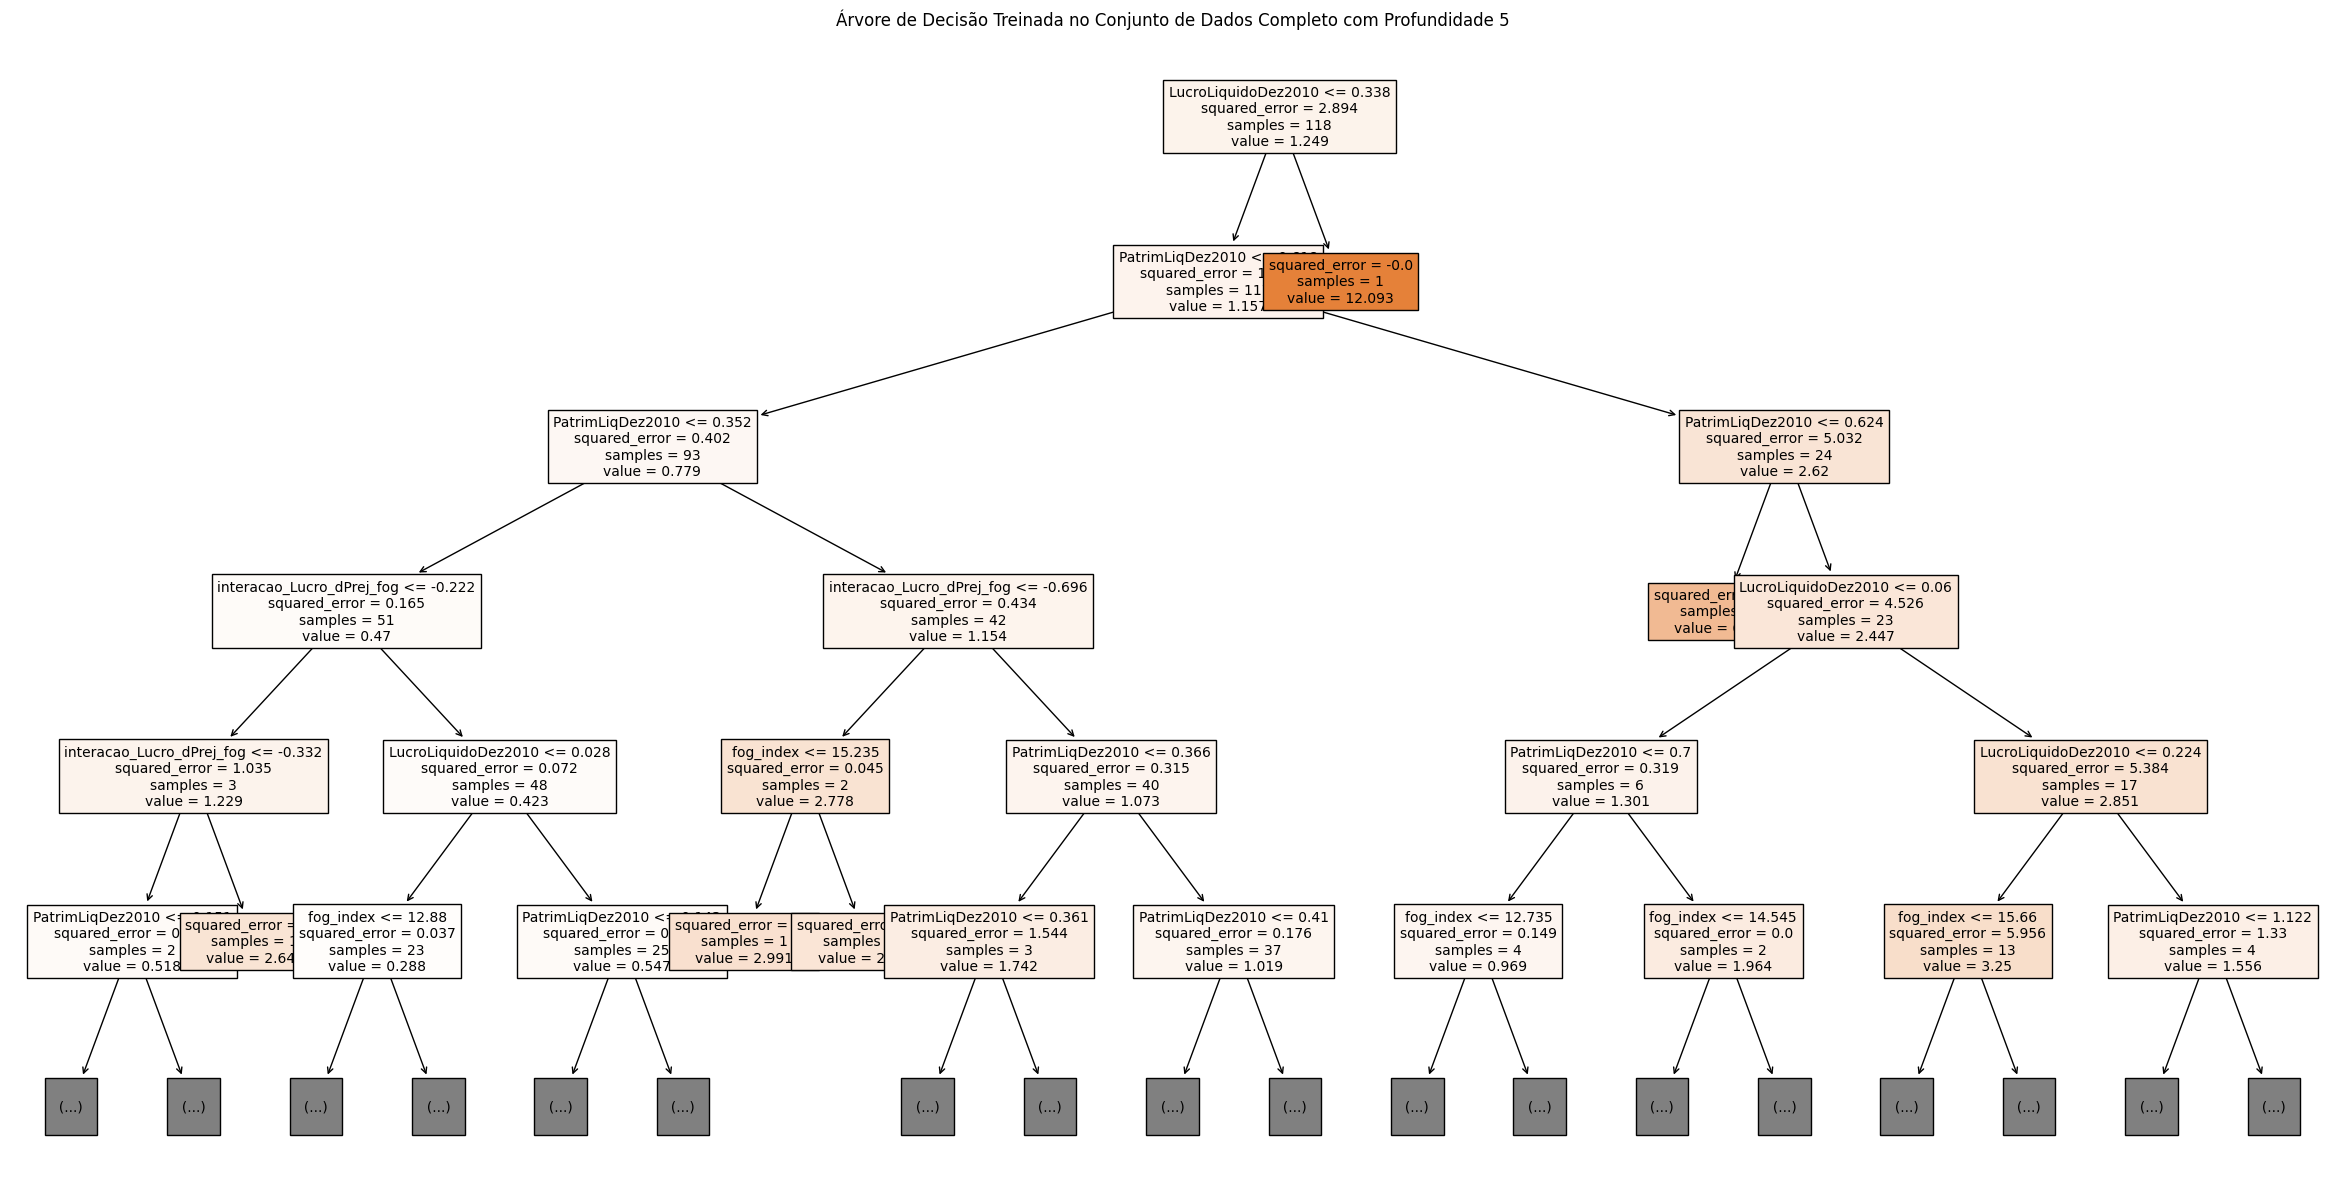

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, r2_score, median_absolute_error

# Suponha que 'df' seja o seu DataFrame

# Definir a variável dependente
y = df['ValorMercado30Jun11']

# As variáveis independentes são definidas sem escalonamento
X = df[['PatrimLiqDez2010', 'LucroLiquidoDez2010', 'd_prej', 'fog_index']].copy()

# Criar a variável de interação
X['interacao_Lucro_dPrej_fog'] = df['LucroLiquidoDez2010'] * df['d_prej'] * df['fog_index']

# Remover linhas com NaN nas variáveis independentes ou na variável dependente
X_y_combinado = X.join(y)
X_y_combinado_limpado = X_y_combinado.dropna()

# Separar X e y após a limpeza
X_limpado = X_y_combinado_limpado.iloc[:, :-1]  # Todas as colunas exceto a última
y_limpado = X_y_combinado_limpado.iloc[:, -1]   # A última coluna

# Instanciar o modelo de árvore de decisão
modelo_cart = DecisionTreeRegressor(random_state=42)

# Definir o método de validação cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Definir métricas para avaliação
scoring = {'r2': 'r2', 'medae': make_scorer(median_absolute_error)}

# Executar validação cruzada com múltiplas métricas
cv_results = cross_validate(modelo_cart, X_limpado, y_limpado, cv=cv, scoring=scoring, return_train_score=False)

# Exibir os resultados da validação cruzada
print(f'R^2 médio nos 10 folds: {cv_results["test_r2"].mean()}')
print(f'MedAE médio nos 10 folds: {cv_results["test_medae"].mean()}')

# Treinar o modelo no conjunto de dados completo para visualização
modelo_cart.fit(X_limpado, y_limpado)

# Calcular a importância das características
feature_importances = modelo_cart.feature_importances_
features = X_limpado.columns
importances_df = pd.DataFrame(data={
    'Feature': features,
    'Importance': feature_importances
})

# Exibir a importância das características
print("\nImportância das Características:")
print(importances_df.sort_values(by='Importance', ascending=False))

# Visualizar a árvore de decisão com profundidade maior
plt.figure(figsize=(30, 15))
plot_tree(modelo_cart, filled=True, feature_names=features, max_depth=5, fontsize=10)
plt.title('Árvore de Decisão Treinada no Conjunto de Dados Completo com Profundidade 5')
plt.show()
